In [9]:
# Upload your ZIP file to Colab
from google.colab import files
uploaded = files.upload()

# Unzip the uploaded file
import zipfile
import os

# Assuming your dataset is the only file uploaded, it will automatically unzip it
for file_name in uploaded.keys():
    with zipfile.ZipFile(file_name, 'r') as zip_ref:
        zip_ref.extractall('audio_dataset')


Saving archive.zip to archive (1).zip


In [3]:
!pip install librosa resampy matplotlib seaborn tensorflow



In [4]:
import os
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix, classification_report


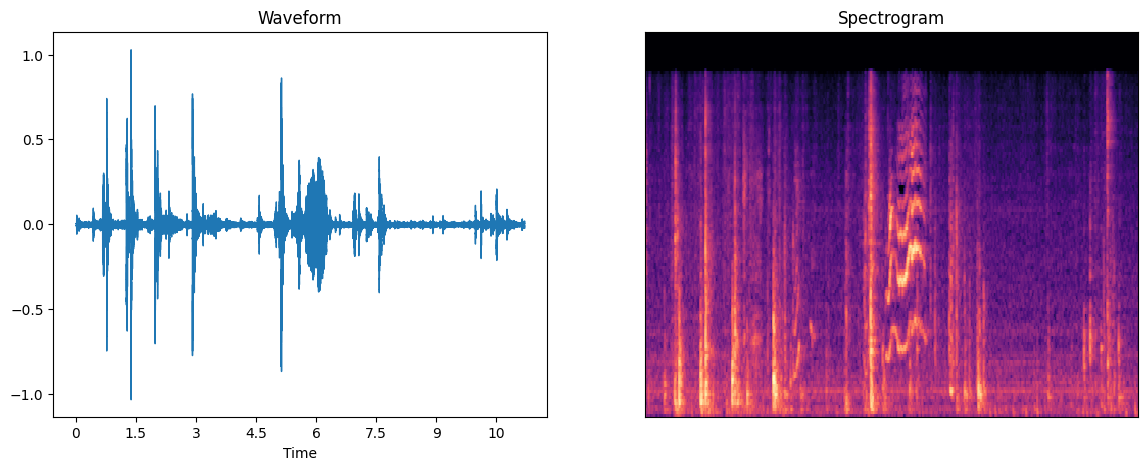

In [5]:
# Set the path to your audio dataset
audio_dir = 'audio_dataset/'  # Path where your ZIP file is extracted

# Visualize audio samples
def visualize_audio(file_name):
    audio, sample_rate = librosa.load(file_name)
    plt.figure(figsize=(14, 5))

    # Plot Waveform
    plt.subplot(1, 2, 1)
    librosa.display.waveshow(audio, sr=sample_rate)
    plt.title("Waveform")

    # Plot Spectrogram
    plt.subplot(1, 2, 2)
    spectrogram = librosa.feature.melspectrogram(y=audio, sr=sample_rate)
    librosa.display.specshow(librosa.power_to_db(spectrogram, ref=np.max), sr=sample_rate)
    plt.title("Spectrogram")

    plt.show()

# Example usage with an actual file:
visualize_audio('audio_dataset/cats_dogs/cat_1.wav')


In [6]:
def extract_features(file_name):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    return np.mean(mfccs.T, axis=0)

features, labels = [], []

# Loop through files in the directory and extract features
print(os.listdir(audio_dir)[0])
# Get the first item in the directory (which is a folder)
first_item = os.listdir(audio_dir)[0]
first_item_path = os.path.join(audio_dir, first_item)

# Check if the first item is a directory (folder)
if os.path.isdir(first_item_path):
    # List the files inside this folder
    for file_name in os.listdir(first_item_path):
        if file_name.endswith('.wav'):
            print("Processing:", file_name)
            file_path = os.path.join(first_item_path, file_name)
            label = 'cat' if 'cat' in file_name.lower() else 'dog'
            features.append(extract_features(file_path))
            labels.append(label)

# Convert features and labels to numpy arrays
X = np.array(features)
y = np.array(labels)

# Encode labels to numerical values and convert to categorical
le = LabelEncoder()
y = to_categorical(le.fit_transform(y))

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


cats_dogs
Processing: cat_51.wav
Processing: dog_barking_26.wav
Processing: dog_barking_28.wav
Processing: cat_131.wav
Processing: cat_57.wav
Processing: cat_82.wav
Processing: cat_134.wav
Processing: cat_12.wav
Processing: cat_11.wav
Processing: dog_barking_104.wav
Processing: cat_6.wav
Processing: dog_barking_61.wav
Processing: dog_barking_101.wav
Processing: cat_160.wav
Processing: cat_156.wav
Processing: cat_146.wav
Processing: cat_142.wav
Processing: cat_7.wav
Processing: cat_138.wav
Processing: dog_barking_63.wav
Processing: dog_barking_36.wav
Processing: dog_barking_108.wav
Processing: dog_barking_52.wav
Processing: dog_barking_23.wav
Processing: dog_barking_106.wav
Processing: dog_barking_66.wav
Processing: dog_barking_102.wav
Processing: dog_barking_87.wav
Processing: dog_barking_111.wav
Processing: cat_105.wav
Processing: dog_barking_8.wav
Processing: dog_barking_80.wav
Processing: dog_barking_3.wav
Processing: dog_barking_60.wav
Processing: cat_114.wav
Processing: dog_barkin

In [7]:
model = Sequential()
model.add(Dense(256, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(y_train.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.5068 - loss: 23.3049 - val_accuracy: 0.5893 - val_loss: 3.3358
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5737 - loss: 14.2891 - val_accuracy: 0.6071 - val_loss: 1.3662
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5850 - loss: 10.6013 - val_accuracy: 0.7857 - val_loss: 0.9631
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6252 - loss: 7.2037 - val_accuracy: 0.7679 - val_loss: 0.7270
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5817 - loss: 8.5050 - val_accuracy: 0.8036 - val_loss: 0.7143
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5881 - loss: 5.8874 - val_accuracy: 0.8036 - val_loss: 0.6812
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5754 - loss: 6.4565 - val_accuracy: 0.7857 - val_loss: 0.6601
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6302 - loss: 5.1125 - val_accuracy: 0.8036 - val_loss: 0.5699
Epo

Test accuracy: 76.79%
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


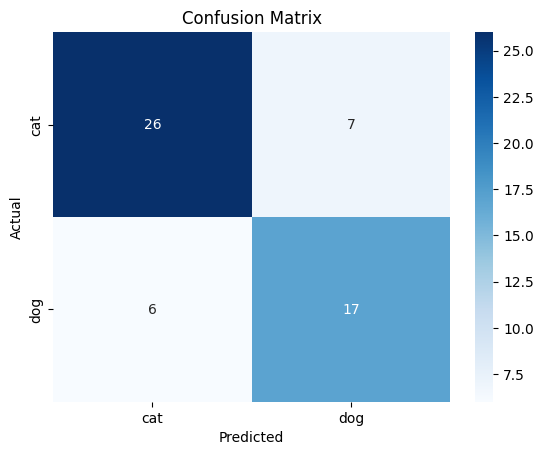

              precision    recall  f1-score   support

         cat       0.81      0.79      0.80        33
         dog       0.71      0.74      0.72        23

    accuracy                           0.77        56
   macro avg       0.76      0.76      0.76        56
weighted avg       0.77      0.77      0.77        56



In [8]:
# Evaluate model performance
score = model.evaluate(X_test, y_test, verbose=0)
print(f'Test accuracy: {score[1]*100:.2f}%')

# Predict on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(y_true, y_pred_classes, target_names=le.classes_))
